In [7]:
!pip install kaggle

In [8]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-jordan-modelthon-car-price-prediction

Saving kaggle.json to kaggle.json
  0% 0.00/872k [00:00<?, ?B/s]
100% 872k/872k [00:00<00:00, 761MB/s]


In [9]:
!unzip /content/ieee-jordan-modelthon-car-price-prediction.zip -d /content/

Archive:  /content/ieee-jordan-modelthon-car-price-prediction.zip
  inflating: /content/sample_submission.csv  
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./train.csv')
df.head()

,Id,Scraped_Time,Condition,Car Make,Model,Trim,Year,Kilometers,Body Type,Number of Seats,...,Neighborhood,Category,Subcategory,Interior Options,Exterior Options,Technology Options,Description_Score,Battery Capacity,Battery Range,Price
0,1,2025-02-07 01:58:30,Used,Toyota,Prius,Prius,2010,"20,000 - 29,999",Sedan,5,...,Abu Alanda,Cars and Bikes,Cars For Sale,"Airbags, Air Condition, Electric Seat Control,...","Panoramic Roof, Electrically Folding Mirrors, ...","Remote Start, Cruise Control, Radar, Navigatio...",فحص كامل,NaN,NaN,9350.0
1,2,2025-02-07 02:27:18,Used,Honda,Civic,Standard,2000,"+200,000",Sedan,4,...,Abu Alanda,Cars and Bikes,Cars For Sale,"Airbags, Center Lock, Air Condition, Alarm Sys...","Rim Wheels, Electric Mirrors",ABS Brakes,NaN,NaN,NaN,4200.0
2,3,2025-02-07 11:55:06,Used,Mitsubishi,Pajero,GLS,2015,"110,000 - 119,999",SUV,7,...,Sports City,Cars and Bikes,Cars For Sale,"Airbags, Steering Wheel Controls, Electric Win...","Spare Tyre, Rim Wheels, Electrically Folding M...","Media Screen, ABS Brakes, Rear Camera, Tractio...",NaN,NaN,NaN,8900.0
3,4,2025-02-07 13:25:57,Used,Nissan,Murano,SE,2005,"180,000 - 189,999",Sedan,5,...,Jabal Al Amera Rahma,Cars and Bikes,Cars For Sale,"Electric Seat Control, Air Condition, AUX / US...","Electrically Folding Mirrors, Electric Mirrors...","Traction Control, Cruise Control, Tyre Pressur...",فحص كامل,NaN,NaN,5500.0
4,5,2025-02-07 12:57:00,Used,Hyundai,H1,GL,2003,"140,000 - 149,999",Bus - Van,5,...,Al Souq,Cars and Bikes,Cars For Sale,"Steering Wheel Controls, Electric Windows, Cen...","Rear Sensors, Electric Mirrors, Daytime Runnin...","Bluetooth, Auto Lock System, Traction Control",NaN,NaN,NaN,5000.0


In [12]:
df.shape

(7478, 33)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  7478 non-null   int64  
 1   Scraped_Time        7478 non-null   object 
 2   Condition           7475 non-null   object 
 3   Car Make            7475 non-null   object 
 4   Model               7475 non-null   object 
 5   Trim                6464 non-null   object 
 6   Year                7474 non-null   object 
 7   Kilometers          7471 non-null   object 
 8   Body Type           7475 non-null   object 
 9   Number of Seats     7472 non-null   object 
 10  Fuel                7471 non-null   object 
 11  Transmission        7471 non-null   object 
 12  Engine Size (cc)    5933 non-null   object 
 13  Exterior Color      7473 non-null   object 
 14  Interior Color      7473 non-null   object 
 15  Regional Specs      7474 non-null   object 
 16  Car Li

In [14]:
df.describe()

,Id,Price
count,7478.000000,7478.000000
mean,3739.500000,12266.734154
std,2158.856989,20556.780639
min,1.000000,600.000000
25%,1870.250000,3600.000000
50%,3739.500000,8200.000000
75%,5608.750000,16000.000000
max,7478.000000,1000000.000000


In [15]:
df.columns

Index(['Id', 'Scraped_Time', 'Condition', 'Car Make', 'Model', 'Trim', 'Year',
       'Kilometers', 'Body Type', 'Number of Seats', 'Fuel', 'Transmission',
       'Engine Size (cc)', 'Exterior Color', 'Interior Color',
       'Regional Specs', 'Car License', 'Insurance', 'Car Customs',
       'Body Condition', 'Paint', 'Payment Method', 'City', 'Neighborhood',
       'Category', 'Subcategory', 'Interior Options', 'Exterior Options',
       'Technology Options', 'Description_Score', 'Battery Capacity',
       'Battery Range', 'Price'],
      dtype='object')

In [16]:
for col in df.columns:
  print("\n*****")
  if len(df[col].unique()) > 10:
    print(col, len(df[col].unique()))
  else:
    print(col, df[col].unique())
    print(df[col].value_counts())
  print(df[col].shape, df[col].isnull().sum())
  print("*****\n")


*****
Id 7478
(7478,) 0
*****


*****
Scraped_Time 6693
(7478,) 0
*****


*****
Condition ['Used' 'New' nan]
Condition
Used    7104
New      371
Name: count, dtype: int64
(7478,) 3
*****


*****
Car Make 75
(7478,) 3
*****


*****
Model 513
(7478,) 3
*****


*****
Trim 547
(7478,) 1014
*****


*****
Year 55
(7478,) 4
*****


*****
Kilometers 24
(7478,) 7
*****


*****
Body Type ['Sedan' 'SUV' 'Bus - Van' 'HatchBack' 'PickUp' 'Coupe' nan 'Convertible']
Body Type
Sedan          3994
SUV            1788
HatchBack       760
PickUp          430
Bus - Van       343
Coupe           118
Convertible      42
Name: count, dtype: int64
(7478,) 3
*****


*****
Number of Seats ['5' '4' '7' '3' '2' '6' 'More than 9' nan '8' '9']
Number of Seats
5              5839
4               929
7               368
2               151
6                75
3                36
8                30
More than 9      28
9                16
Name: count, dtype: int64
(7478,) 6
*****


*****
Fuel ['Hybrid' 'Gasoline' 'Di

In [17]:
df['City'].unique()

array(['Amman', 'Zarqa', 'Irbid', 'Ramtha', 'Al Karak', 'Salt', 'Aqaba',
       'Ajloun', 'Jerash', 'Mafraq', "Ma'an", 'Madaba', 'Jordan Valley',
       'Tafila'], dtype=object)

In [18]:
test_df = pd.read_csv('./test.csv')
test_df.shape

(4027, 32)

In [19]:
for col in test_df.columns:
  set1 = set(df[col].unique())
  set2 = set(test_df[col].unique())
  if set1 != set2:
    print(col)
    print(set1 - set2)
    print(len(set1 - set2))
    print(set2 - set1)
    print(len(set2 - set1))
    print('\n')

Id
{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72

In [20]:
cols_to_drop = ['Id','Neighborhood','Description_Score','Subcategory','Category','Model','Trim'] # 'Car Make', 'Description_Score'

In [21]:
df1 = df.drop(cols_to_drop, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Scraped_Time        7478 non-null   object 
 1   Condition           7475 non-null   object 
 2   Car Make            7475 non-null   object 
 3   Year                7474 non-null   object 
 4   Kilometers          7471 non-null   object 
 5   Body Type           7475 non-null   object 
 6   Number of Seats     7472 non-null   object 
 7   Fuel                7471 non-null   object 
 8   Transmission        7471 non-null   object 
 9   Engine Size (cc)    5933 non-null   object 
 10  Exterior Color      7473 non-null   object 
 11  Interior Color      7473 non-null   object 
 12  Regional Specs      7474 non-null   object 
 13  Car License         7471 non-null   object 
 14  Insurance           7471 non-null   object 
 15  Car Customs         7471 non-null   object 
 16  Body C

In [22]:
dummy_df = df1.drop(['Battery Range','Battery Capacity', 'Engine Size (cc)'], axis=1)
dummy_df = dummy_df.dropna()
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 0 to 7477
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Scraped_Time        7101 non-null   object 
 1   Condition           7101 non-null   object 
 2   Car Make            7101 non-null   object 
 3   Year                7101 non-null   object 
 4   Kilometers          7101 non-null   object 
 5   Body Type           7101 non-null   object 
 6   Number of Seats     7101 non-null   object 
 7   Fuel                7101 non-null   object 
 8   Transmission        7101 non-null   object 
 9   Exterior Color      7101 non-null   object 
 10  Interior Color      7101 non-null   object 
 11  Regional Specs      7101 non-null   object 
 12  Car License         7101 non-null   object 
 13  Insurance           7101 non-null   object 
 14  Car Customs         7101 non-null   object 
 15  Body Condition      7101 non-null   object 
 16  Paint      

In [23]:
import seaborn as sns

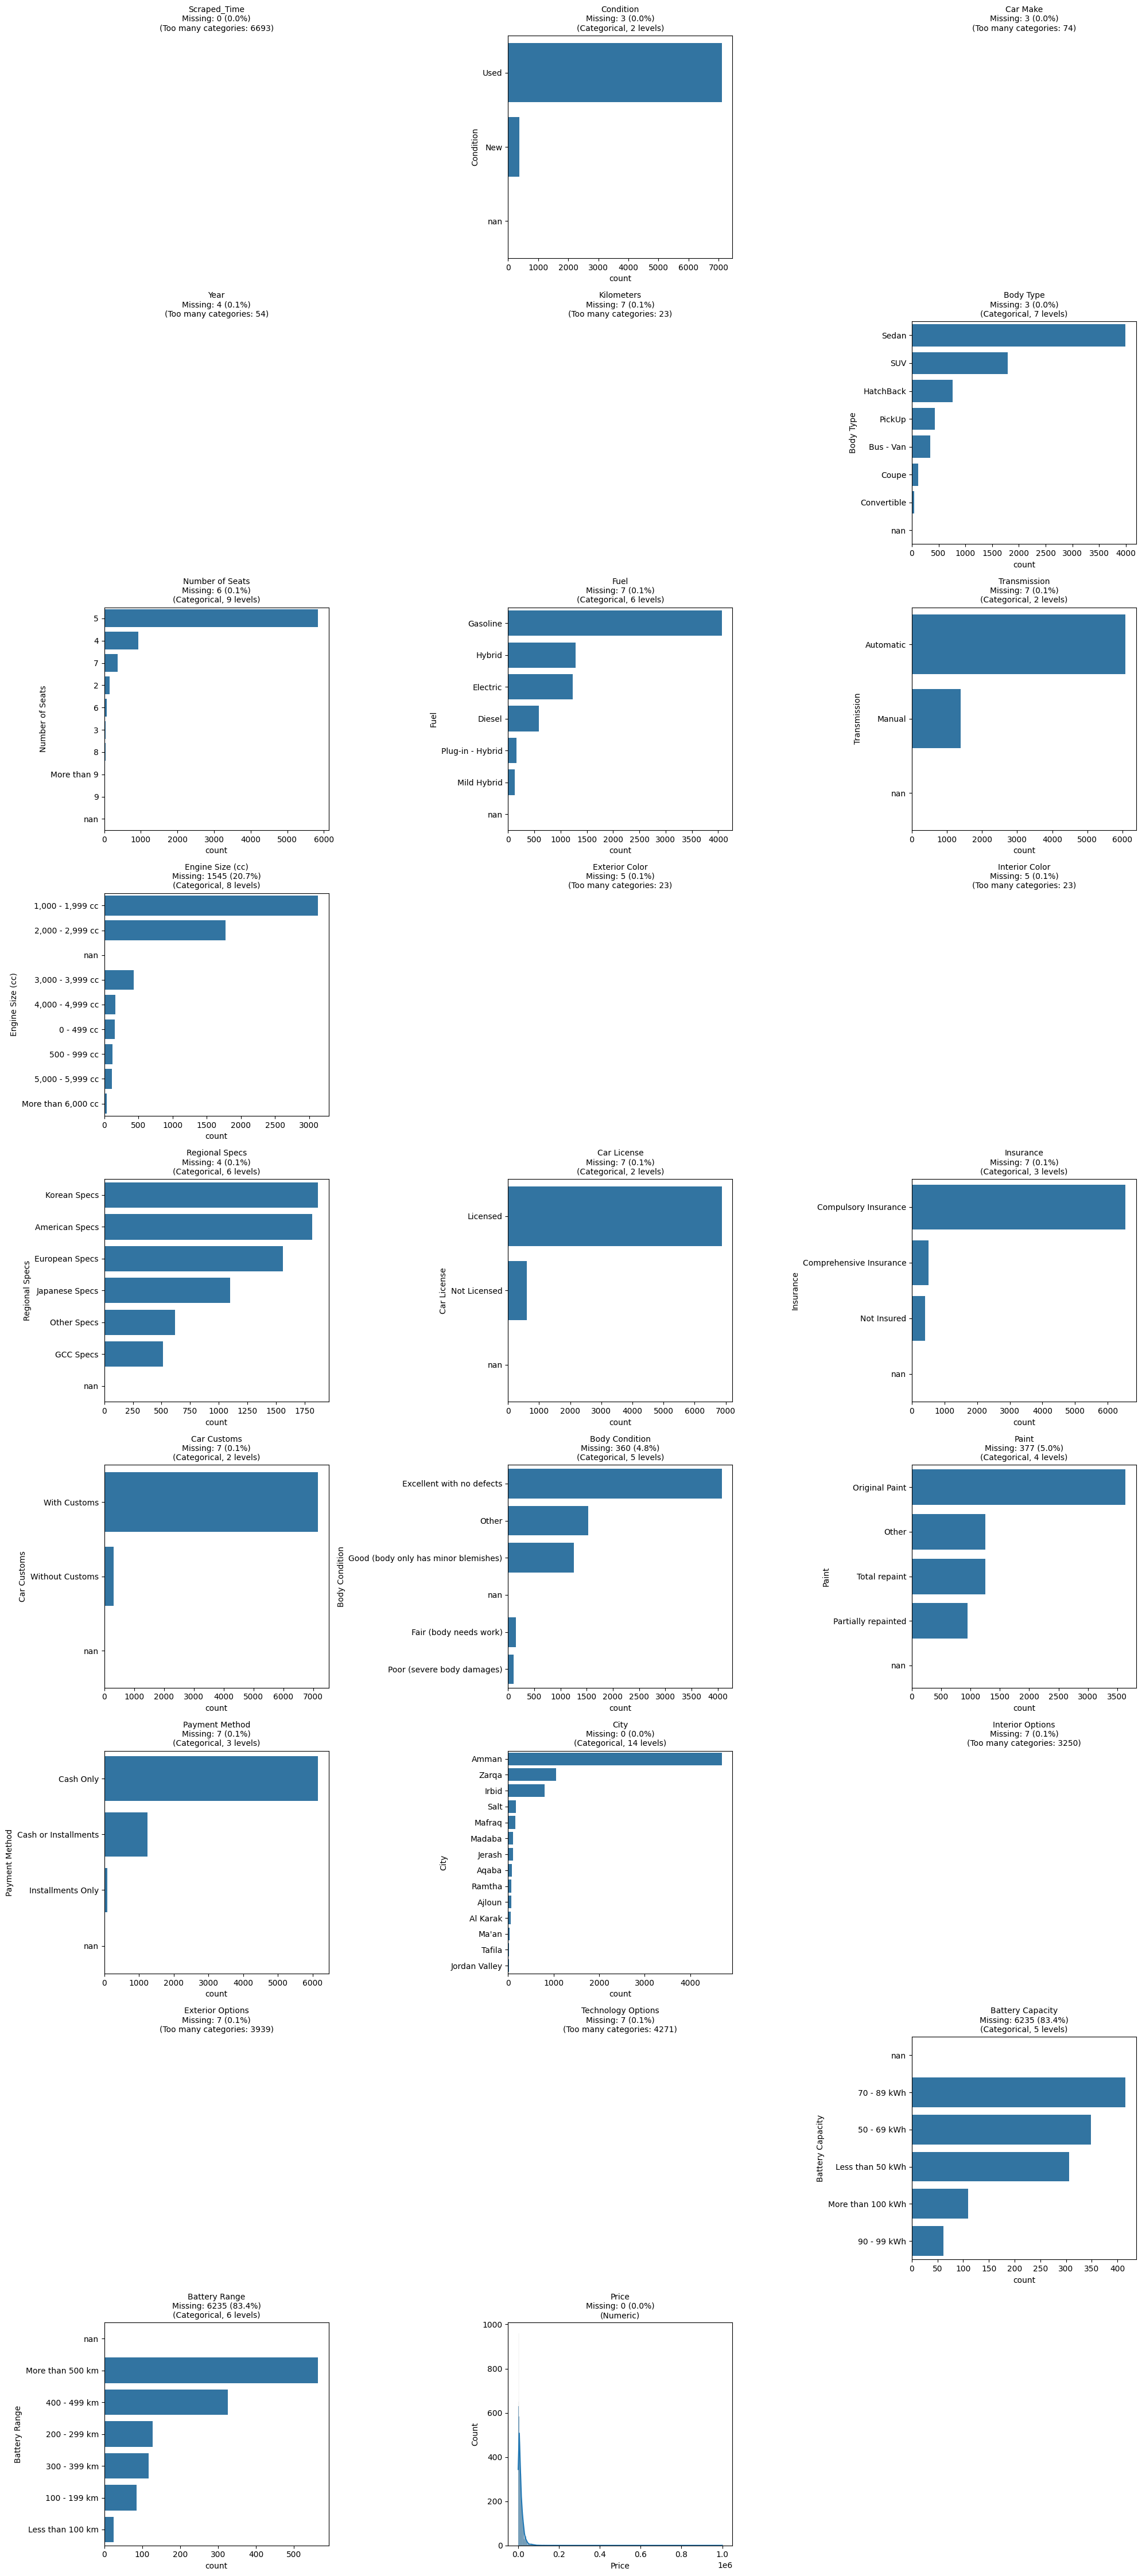

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

num_cols = len(df1.columns)
cols_per_row = 3
num_rows = int(np.ceil(num_cols / cols_per_row))

fig, ax = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 5 * num_rows))
ax = ax.flatten()  # Flatten for easy indexing

for i, col in enumerate(df1.columns):
    miss_count = df1[col].isna().sum()
    miss_pct = miss_count / len(df1)
    title_base = f"{col}\nMissing: {miss_count} ({miss_pct:.1%})"

    try:
        if np.issubdtype(df1[col].dtype, np.number):
            sns.histplot(df1[col].dropna(), ax=ax[i], kde=True)
            ax[i].set_title(f"{title_base}\n(Numeric)", fontsize=10)
        else:
            num_unique = df1[col].nunique(dropna=True)
            if num_unique <= 20:
                sns.countplot(
                    y=col, data=df1, ax=ax[i],
                    order=df1[col].value_counts(dropna=False).index
                )
                ax[i].set_title(f"{title_base}\n(Categorical, {num_unique} levels)", fontsize=10)
            else:
                ax[i].axis('off')
                ax[i].set_title(f"{title_base}\n(Too many categories: {num_unique})", fontsize=10)
    except Exception:
        ax[i].axis('off')
        ax[i].set_title(f"{title_base}\n(Error)", fontsize=10)

# Hide any unused axes
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [25]:
df1['Interior Options']

,Interior Options
0,"Airbags, Air Condition, Electric Seat Control,..."
1,"Airbags, Center Lock, Air Condition, Alarm Sys..."
2,"Airbags, Steering Wheel Controls, Electric Win..."
3,"Electric Seat Control, Air Condition, AUX / US..."
4,"Steering Wheel Controls, Electric Windows, Cen..."
...,...
7473,"Airbags, Heated Steering Wheel, Electric Seat ..."
7474,"Airbags, Leather Seats, Electric Seat Control,..."
7475,"Air Condition, Electric Windows, Leather Seats"
7476,Electric Seat Control


In [26]:
all_options = set()
df1['Interior Options'].dropna().apply(lambda x: all_options.update(x.split(',')))
all_options.__len__()

32

In [27]:
all_options = set()
df1['Exterior Options'].dropna().apply(lambda x: all_options.update(x.split(',')))
all_options

{' Back Hook',
 ' Daytime Running Lights',
 ' Electric Mirrors',
 ' Electrically Folding Mirrors',
 ' Front Sensors',
 ' Keyless Entry',
 ' LED Lights',
 ' Panoramic Roof',
 ' Rear Sensors',
 ' Rim Wheels',
 ' Spare Tyre',
 ' Sports Package',
 ' Sunroof',
 ' Xenon Lights',
 'Back Hook',
 'Daytime Running Lights',
 'Electric Mirrors',
 'Electrically Folding Mirrors',
 'Front Sensors',
 'Keyless Entry',
 'LED Lights',
 'Panoramic Roof',
 'Rear Sensors',
 'Rim Wheels',
 'Spare Tyre',
 'Sports Package',
 'Sunroof',
 'Xenon Lights'}

In [28]:
dummy_df.columns

Index(['Scraped_Time', 'Condition', 'Car Make', 'Year', 'Kilometers',
       'Body Type', 'Number of Seats', 'Fuel', 'Transmission',
       'Exterior Color', 'Interior Color', 'Regional Specs', 'Car License',
       'Insurance', 'Car Customs', 'Body Condition', 'Paint', 'Payment Method',
       'City', 'Interior Options', 'Exterior Options', 'Technology Options',
       'Price'],
      dtype='object')

In [46]:
label_cols = {'Condition', 'Paint', 'Insurance', 'Car License', 'Body Condition'}
multi_label_cols = {'Interior Options', 'Exterior Options', 'Technology Options'}
categorical_cols = ['Car Make', 'Year', 'Kilometers',
       'Body Type', 'Number of Seats', 'Fuel', 'Transmission',
       'Exterior Color', 'Interior Color', 'Regional Specs','Insurance',
       'Car Customs', 'Payment Method','City']
# Scraped_Time,

In [47]:
from sklearn.preprocessing import LabelEncoder

df_encoded = dummy_df.copy()

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

one_hot_cols = [col for col in categorical_cols if col not in label_cols]

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

df_encoded.head()

,Scraped_Time,Condition,Car License,Insurance,Body Condition,Paint,Interior Options,Exterior Options,Technology Options,Price,...,City_Irbid,City_Jerash,City_Jordan Valley,City_Ma'an,City_Madaba,City_Mafraq,City_Ramtha,City_Salt,City_Tafila,City_Zarqa
0,2025-02-07 01:58:30,1,0,1,0,3,"Airbags, Air Condition, Electric Seat Control,...","Panoramic Roof, Electrically Folding Mirrors, ...","Remote Start, Cruise Control, Radar, Navigatio...",9350.0,...,False,False,False,False,False,False,False,False,False,False
1,2025-02-07 02:27:18,1,0,1,3,3,"Airbags, Center Lock, Air Condition, Alarm Sys...","Rim Wheels, Electric Mirrors",ABS Brakes,4200.0,...,False,False,False,False,False,False,False,False,False,False
2,2025-02-07 11:55:06,1,0,1,0,0,"Airbags, Steering Wheel Controls, Electric Win...","Spare Tyre, Rim Wheels, Electrically Folding M...","Media Screen, ABS Brakes, Rear Camera, Tractio...",8900.0,...,False,False,False,False,False,False,False,False,False,False
3,2025-02-07 13:25:57,1,0,1,0,0,"Electric Seat Control, Air Condition, AUX / US...","Electrically Folding Mirrors, Electric Mirrors...","Traction Control, Cruise Control, Tyre Pressur...",5500.0,...,False,False,False,False,False,False,False,False,False,True
4,2025-02-07 12:57:00,1,0,0,0,0,"Steering Wheel Controls, Electric Windows, Cen...","Rear Sensors, Electric Mirrors, Daytime Runnin...","Bluetooth, Auto Lock System, Traction Control",5000.0,...,False,False,False,False,False,False,False,False,False,True


In [48]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype('int8')

In [49]:
# df_encoded.head()

In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

df_transformed = df_encoded.copy()

for col in multi_label_cols:
    # Replace NaNs with empty string
    df_transformed[col] = df_transformed[col].fillna('')

    # Split each entry by comma, remove leading/trailing spaces
    split_series = df_transformed[col].apply(lambda x: [i.strip() for i in x.split(',') if i.strip() != ''])

    # Apply MultiLabelBinarizer to convert into binary columns
    mlb = MultiLabelBinarizer()
    transformed = mlb.fit_transform(split_series)

    # Create a DataFrame with the new one-hot encoded columns
    new_cols = pd.DataFrame(transformed, columns=[f"{col} - {cls}" for cls in mlb.classes_], index=df_transformed.index)

    # Concatenate to the original DataFrame
    df_transformed = pd.concat([df_transformed.drop(columns=[col]), new_cols], axis=1)

df_transformed.head()

,Scraped_Time,Condition,Car License,Insurance,Body Condition,Paint,Price,Car Make_Avatar,Car Make_BAIC,Car Make_BMW,...,Technology Options - Navigation system / maps,Technology Options - Park assist,Technology Options - Radar,Technology Options - Rear Camera,Technology Options - Remote Start,Technology Options - Sport Suspension,Technology Options - Touch Screen,Technology Options - Traction Control,Technology Options - Tyre Pressure Monitoring,Technology Options - Voice Control
0,2025-02-07 01:58:30,1,0,1,0,3,9350.0,0,0,0,...,1,0,1,1,1,0,1,1,0,1
1,2025-02-07 02:27:18,1,0,1,3,3,4200.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025-02-07 11:55:06,1,0,1,0,0,8900.0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
3,2025-02-07 13:25:57,1,0,1,0,0,5500.0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,2025-02-07 12:57:00,1,0,0,0,0,5000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
final_df = df_transformed.copy()

final_df['Scraped_Time'] = pd.to_datetime(final_df['Scraped_Time'], errors='coerce')

# Extract features
final_df['Scraped_Year'] = final_df['Scraped_Time'].dt.year
final_df['Scraped_Month'] = final_df['Scraped_Time'].dt.month
final_df['Scraped_Day'] = final_df['Scraped_Time'].dt.day
final_df['Scraped_Hour'] = final_df['Scraped_Time'].dt.hour
final_df['Scraped_Weekday'] = final_df['Scraped_Time'].dt.weekday  # 0=Mon
final_df['Scraped_WeekOfYear'] = final_df['Scraped_Time'].dt.isocalendar().week

# Optional: categorize time of day
def time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

final_df['Scraped_TimeOfDay'] = final_df['Scraped_Hour'].apply(time_of_day)

# One-hot encode TimeOfDay
final_df = pd.get_dummies(final_df, columns=['Scraped_TimeOfDay'], drop_first=True, dtype='int8')

# Drop original timestamp
final_df = final_df.drop(columns=['Scraped_Time'])
final_df.head()

,Condition,Car License,Insurance,Body Condition,Paint,Price,Car Make_Avatar,Car Make_BAIC,Car Make_BMW,Car Make_BYD,...,Technology Options - Voice Control,Scraped_Year,Scraped_Month,Scraped_Day,Scraped_Hour,Scraped_Weekday,Scraped_WeekOfYear,Scraped_TimeOfDay_Evening,Scraped_TimeOfDay_Morning,Scraped_TimeOfDay_Night
0,1,0,1,0,3,9350.0,0,0,0,0,...,1,2025,2,7,1,4,6,0,0,1
1,1,0,1,3,3,4200.0,0,0,0,0,...,0,2025,2,7,2,4,6,0,0,1
2,1,0,1,0,0,8900.0,0,0,0,0,...,0,2025,2,7,11,4,6,0,1,0
3,1,0,1,0,0,5500.0,0,0,0,0,...,0,2025,2,7,13,4,6,0,0,0
4,1,0,0,0,0,5000.0,0,0,0,0,...,0,2025,2,7,12,4,6,0,0,0


In [52]:
from sklearn.model_selection import train_test_split

X = final_df.drop('Price', axis=1)
y = final_df['Price']

In [55]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6080315308560685

In [56]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

63485879.323146544